In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import matplotlib.cm as cm
from pathlib import Path
from ModelTools.PostProcess import *

In [2]:
episode_summary_path = rf"D:\kody\rl_project\out\logs\A2C\A2C_1\episodes_summary.csv"
episode_all_path = rf"D:\kody\rl_project\out\logs\A2C\A2C_1\episodes_all.csv"

df_summary = pd.read_csv(episode_summary_path, index_col=False)
df_all = pd.read_csv(episode_all_path, index_col=False)
df_all.set_index(['episode','env'], inplace=True, drop=True)
df_all

step       dist  angle_diff     pos_X         pos_Y    reward  \
episode env                                                                    
1       9       8.0   7.071082    0.000007 -0.000020  1.625326e-08  0.749899   
        9     168.0   7.086238    0.002545 -0.023349  1.926651e-03  0.747365   
        9     328.0   7.163202   -0.005417 -0.124402 -5.193447e-03  0.742660   
        9     488.0   7.301654   -0.010611 -0.312500 -9.140913e-03  0.735814   
        9     648.0   7.491223    0.003182 -0.581294  3.242846e-03  0.727206   
...             ...        ...         ...       ...           ...       ...   
539     13   5272.0  11.085864    2.807028 -5.720573  7.822353e+00  0.554628   
        13   5432.0  10.340143    2.743928 -4.831100  8.204378e+00  0.576985   
        13   5592.0   9.601525    2.741609 -3.923422  8.544267e+00  0.598973   
        13   5752.0   8.880720    2.766357 -3.002067  8.851508e+00  0.620253   
        13   5912.0   7.964467    2.804886 -1.798199  9.149363e+00  0.647626   

             velocity  
episode env            
1       9   -0.006672  
        9   -0.367455  
        9   -0.889213  
        9   -1.443886  
        9   -1.936516  
...               ...  
539     13  -4.458917  
        13  -4.242913  
        13  -4.318202  
        13  -4.686237  
        13  -6.463970  

[249653 rows x 7 columns]

In [3]:
df_all.describe()

,step,dist,angle_diff,pos_X,pos_Y,reward,velocity
count,249653.000000,249653.000000,249653.000000,249653.000000,249653.000000,249653.000000,249653.000000
mean,2835.123535,10.437386,-0.664307,-3.282152,0.309740,0.601480,-1.285172
std,2483.458437,3.353739,1.198468,4.400743,3.211396,0.120302,2.961840
min,8.000000,0.000000,-3.141554,-9.757559,-9.742609,0.217391,-10.000000
25%,1184.000000,7.385019,-1.501554,-7.786552,-0.877577,0.480964,-3.229304
50%,2368.000000,10.306216,-0.580659,-2.914463,-0.123287,0.602824,-2.042289
75%,3800.000000,13.718597,-0.088363,-0.079303,0.997047,0.720723,-0.464926
max,30008.000000,20.091413,3.141574,9.715268,9.461451,0.951482,10.000000


In [4]:
grouped = df_all.groupby(by=['episode','env'])
summed = grouped.sum().sort_values('reward', ascending=False)

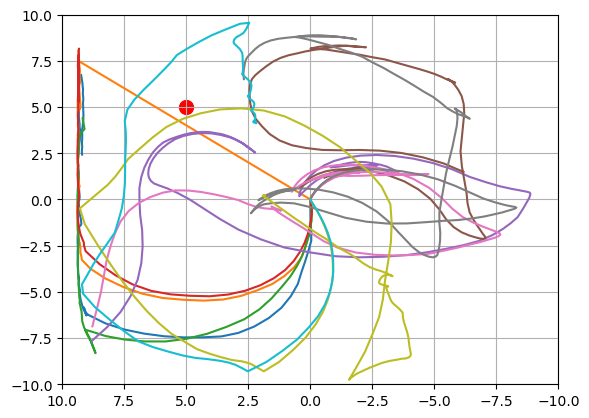

In [5]:
from cProfile import label

indexes = summed[:10].index.to_list()
best_traces = df_all.loc[indexes]

fig, axs = plot_trajectory(best_traces)
axs.scatter(5,5, c='r', s=100)
axs.legend().remove()

In [11]:
# get_rows_by_ep_env(df_all, [(0,0)])
df_all

step       dist  angle_diff     pos_X         pos_Y    reward  \
episode env                                                                    
1       9       8.0   7.071082    0.000007 -0.000020  1.625326e-08  0.749899   
        9     168.0   7.086238    0.002545 -0.023349  1.926651e-03  0.747365   
        9     328.0   7.163202   -0.005417 -0.124402 -5.193447e-03  0.742660   
        9     488.0   7.301654   -0.010611 -0.312500 -9.140913e-03  0.735814   
        9     648.0   7.491223    0.003182 -0.581294  3.242846e-03  0.727206   
...             ...        ...         ...       ...           ...       ...   
539     13   5272.0  11.085864    2.807028 -5.720573  7.822353e+00  0.554628   
        13   5432.0  10.340143    2.743928 -4.831100  8.204378e+00  0.576985   
        13   5592.0   9.601525    2.741609 -3.923422  8.544267e+00  0.598973   
        13   5752.0   8.880720    2.766357 -3.002067  8.851508e+00  0.620253   
        13   5912.0   7.964467    2.804886 -1.798199  9.149363e+00  0.647626   

             velocity  
episode env            
1       9   -0.006672  
        9   -0.367455  
        9   -0.889213  
        9   -1.443886  
        9   -1.936516  
...               ...  
539     13  -4.458917  
        13  -4.242913  
        13  -4.318202  
        13  -4.686237  
        13  -6.463970  

[249653 rows x 7 columns]